# Assignment_3 DT

In [465]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [466]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [467]:
iris.keys

<function Bunch.keys>

## Q1 Plot decision tree using export_graphviz

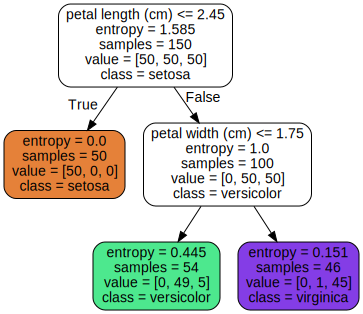

In [468]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [469]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

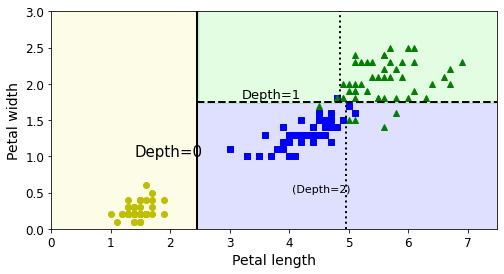

In [470]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. Using the entropy equation to calculate the entropy using given data

First Block --> Entropy = 1.585 as data size = 150 and every class has value of 50

Secode Block --> Entropy = 0 as data size = 50 (petal length (cm) <= 2.45) and all values contain setosa class --> this condition seperate all setosa class from the data and thus the entropy = 0 --> Class Setosa
- Predict probability of  Class Setosa = 1
- Predict probability of  Class Virginica = 0
- Predict probability of  Class Versicolor = 0


Third Block --> Entropy = 1 as data size = 100 (petal length (cm) > 2.45 & petal width (cm) <= 1.75) and equal as it contains 5o from class versicolor and 50 from class virginica and will divided into two blocks (One for class versicolor and the other for virginica) -->

- Predict probability of  Class Virginica = 0.5
- Predict probability of  Class Versicolor = 0.5
- Predict probability of  Class Setosa = 0

Fourth Block --> Entropy = 0.445 as data size = 54 (petal length (cm) > 2.45 & petal width (cm) <= 1.75) and contain 49 from class versicolor and 5 from class virginica --> 
- Predict probability of  Class Versicolor = 0.9074074074
- Predict probability of  Class Virginica = 0.0925925926
- Predict probability of  Class Setosa = 0

Fifth Block --> Entropy = 0.151 as data size = 46 (petal length (cm) > 2.45 & petal width (cm) > 1.75) and contain 1 from class versicolor and 45 from class virginica --> 
- Predict probability of  Class Virginica = 0.9782608696 
- Predict probability of  Class Versicolor = 0.0217391304
- Predict probability of  Class Setosa = 0

2. 
| max_depth = 1 |  max_depth = 2 | max_depth = 10 |
| ------------- | ------------- | ------------- |
| Seperate class setose from other classes | Seperate class setose from other classes   | Seperate class setose from other classes   |
| Cannot seperate class virginica from class versicolor (Probability of each clas is 50% if petal length (cm) > 2.45 --> high error)| Can seperate class virginica from class versicolor with small probability to get it not correct   | Can seperate class virginica from class versicolor with very few probability to get it not correct (very very very small) |
| It has least complexity | It has complexity more than max_depth = 1   | It has highest complexity   |
| Doesn't fit the data well | Fits the data more than max_depth = 1     | Fits the data very well   |
| Has a higher bias error | Has a high bias error     | Has a higher variance error   |




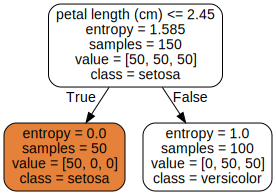

In [471]:
####### YOUR CODE HERE

tree_clf1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf1.fit(X, y)

export_graphviz(
        tree_clf1,
        out_file=os.path.join("./", "iris_tree1.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join("./", "iris_tree1.dot"))

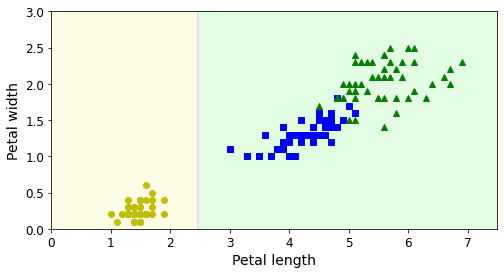

In [472]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf1, X, y)

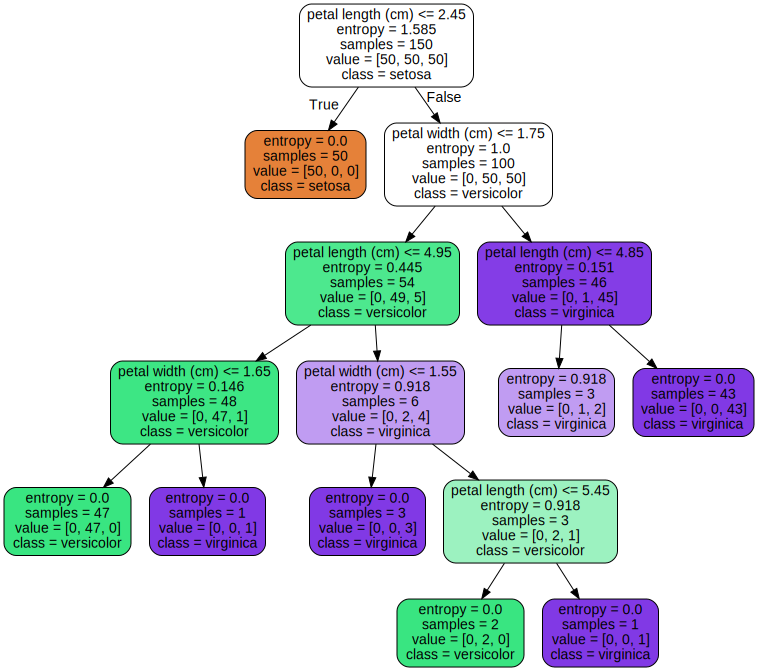

In [473]:
tree_clf2 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf2.fit(X, y)

export_graphviz(
        tree_clf2,
        out_file=os.path.join("./", "iris_tree2.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join("./", "iris_tree2.dot"))

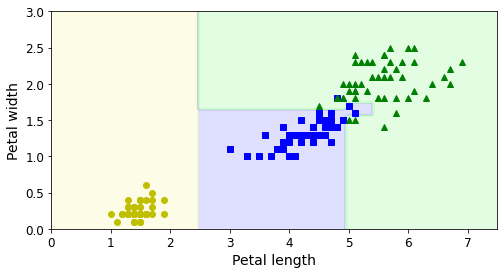

In [474]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf2, X, y)

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. For this data petal length (cm) = 5 and petal width (cm) = 1.5 using decision tree with max_depth = 2 the probabilities of each class will be:

$$
- Predict Probability of Class Setosa = \frac{0}{54} = 0
$$

$$
- Predict Probability of Class Versicolor = \frac{49}{54} = 0.9074074074
$$

$$
- Predict Probability of Class Virginica = \frac{5}{54} = 0.0925925926
$$

In [475]:
######### Your code for (2.)

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Train score accuracy of the original data:  0.96


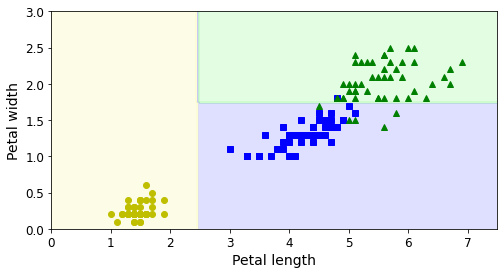

In [476]:
##### YOUR CODE HERE
tree_clf_original = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_original.fit(X, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_original, X, y)

original_train_score = tree_clf_original.score(X, y)
print("Train score accuracy of the original data: ", original_train_score)

The following cell rotates the data by angle 20

In [477]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Train score accuracy of the rotated data:  0.9733333333333334


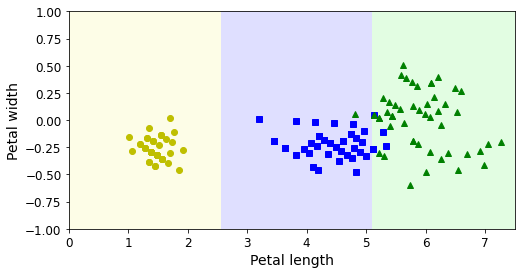

In [478]:
##### YOUR CODE HERE

tree_clf_rotated = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_rotated.fit(Xr, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_rotated, Xr, y, axes=[0.0, 7.5, -1.0, 1.0])

rotated_train_score = tree_clf_rotated.score(Xr, y)
print("Train score accuracy of the rotated data: ", rotated_train_score)

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [479]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

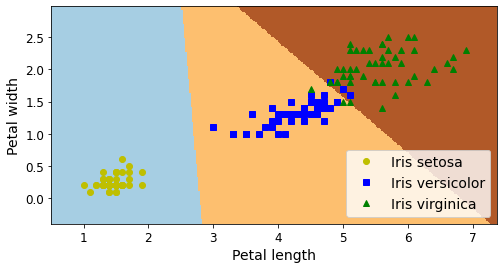

Train score accuracy of the original data:  0.9666666666666667


In [480]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

reg_original = LogisticRegression(random_state=42)
reg_original.fit(X, y)

plt.figure(figsize=(8, 4))
plot_logistic_regression(reg_original, X, y, axes=[0.0, 7.5, -1.0, 1.0])

orignal_train_score = reg_original.score(X, y)
print("Train score accuracy of the original data: ", orignal_train_score)


**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

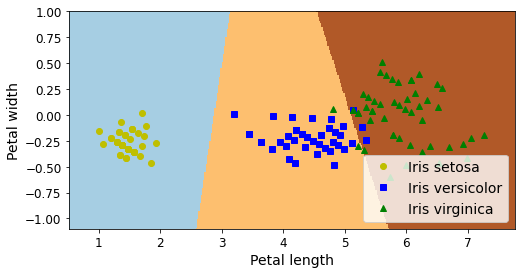

Train score accuracy of the rotated data:  0.9666666666666667


In [481]:
###### YOUR CODE HERE

reg_rotated = LogisticRegression(random_state=42)
reg_rotated.fit(Xr, y)

plt.figure(figsize=(8, 4))
plot_logistic_regression(reg_rotated, Xr, y, axes=[0.0, 7.5, -1.0, 1.0])

rotated_train_score = reg_rotated.score(Xr, y)
print("Train score accuracy of the rotated data: ", rotated_train_score)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1.

| Logistic Regression Classifier  |   Decision Tree Classifier |
| ------------- | ------------- |
| Same scores of original data and rotated data | Different scores of original data and rotated data   | 
| Score doesn't affected by the rotation of the given data | Score affected by the rotation of the given data   | 
| Train score accuracy of the original data:  0.9666666666666667 | Train score accuracy of the original data:  0.96   | 
| Train score accuracy of the rotated data:  0.9666666666666667 | Train score accuracy of the rotated data:  0.9733333333333334   | 

2. 
- This happen because Logistic Regression is considered as generalized linear model while Decision Tree is a non linear model and the rotation of the data is a linear transformation. 

- In Logistic Regression Classifier when the data rotated the boundaries that seperate the data also rotated to get the best line that seperate classes.  Also these lines with the original data is rotated by angle (not perpendiculr to axis)

- In Decision Tree Classifier when the data rotated the boundaries that seperate the data found better line that seperate between versicolor and virginica but stil these line are perpendicular to axis. So the place of the line change but not with angle and this result in better accuracy



## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [482]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [483]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.
    - Apply GridSearch on a portion of training data.

In [484]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1, 10)), 'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': list(range(2, 5))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

grid_search_cv.fit(X_train2, y_train2)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)


Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
DecisionTreeClassifier(max_depth=9, max_leaf_nodes=27, random_state=42)
{'max_depth': 9, 'max_leaf_nodes': 27, 'min_samples_split': 2}
0.8582032286429255


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [485]:
tree_clf_best = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=27, min_samples_split=2, random_state=42)
tree_clf_best.fit(X_train, y_train)

test_score = tree_clf_best.score(X_test, y_test)
print("Test score accuracy: ", test_score)

Test score accuracy:  0.8725


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. Model with max_depth = 5 fits the given data more than Model with max_depth = 2, So the deeper the tree, the more complex the decision rules and the fitter the model  
2. Model with max_depth = 5 has a higher variance error as the model fist more on the given data so it will give more error on any test data and accuracy will be lower
3. Model with max_depth = 2 has a higher bias error as the model is not fit well on thge given data so the accuracy of the given data will be lower than the accuracy of the other model

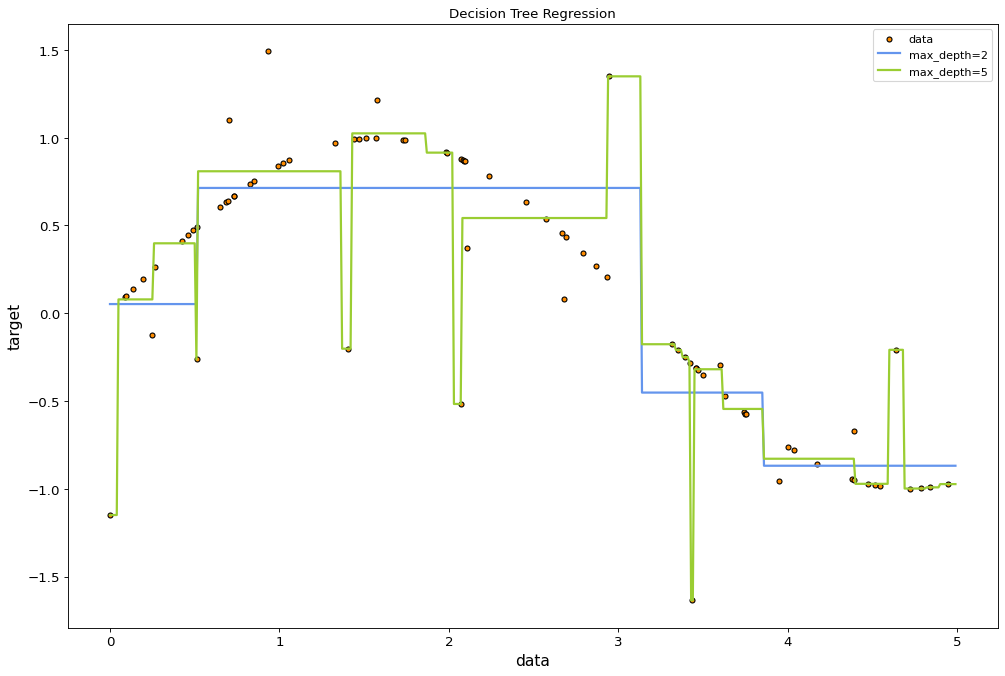

In [486]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()